In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
os.sys.path.append('../')
from soundkit.fit import datagen, models
import tensorflow as tf
import tensorflow.keras.applications as imagenet_models


#### Create data generator
---

In [2]:
# get a list of train/val files and create label dictionary
files_train, files_val, labels = datagen.get_files_and_label_map(['./tmp/positive/', './tmp/negative/'])


In [3]:
# check number of samples per class
datagen.num_pos_neg_per_class(files_train)
datagen.num_pos_neg_per_class(files_val)


,Class,Positives,Negatives
0,42545_1,63,725
1,4931_1,179,885


,Class,Positives,Negatives


In [4]:
# get label vector
y_train = datagen.get_labels_pos_neg_per_class(files_train, labels)
y_val = datagen.get_labels_pos_neg_per_class(files_val, labels)


In [5]:
y_train.shape

(1852, 2)

#### No augmentation

In [6]:
traingen = datagen.TrainGenerator(files_train,
                                  y_train,
                                  labels,
                                  batch_size = 16,
                                  augment=False)
%time batch = traingen.__getitem__(0)
print('Batch shape:',batch[0].shape)
print('Target shape:',batch[1].shape)
# datagen.plot_batch_samples(batch[0])
batch1=batch[0]


CPU times: user 32.8 ms, sys: 17.7 ms, total: 50.6 ms
Wall time: 29.9 ms
Batch shape: (16, 513, 296)
Target shape: (16, 2)


#### Default augmentation

In [7]:
traingen = datagen.TrainGenerator(files_train,
                                  y_train,
                                  labels,
                                  batch_size = 16,
                                  augment=True)
%time batch = traingen.__getitem__(0)
print('Batch shape:',batch[0].shape)
print('Target shape:',batch[1].shape)
# datagen.plot_batch_samples(batch[0])
batch2 = batch[0]


CPU times: user 291 ms, sys: 85.7 ms, total: 377 ms
Wall time: 243 ms
Batch shape: (16, 513, 296)
Target shape: (16, 2)


#### All options

CPU times: user 600 ms, sys: 10.6 ms, total: 611 ms
Wall time: 420 ms
Batch shape: (16, 513, 296)
Target shape: (16, 2)


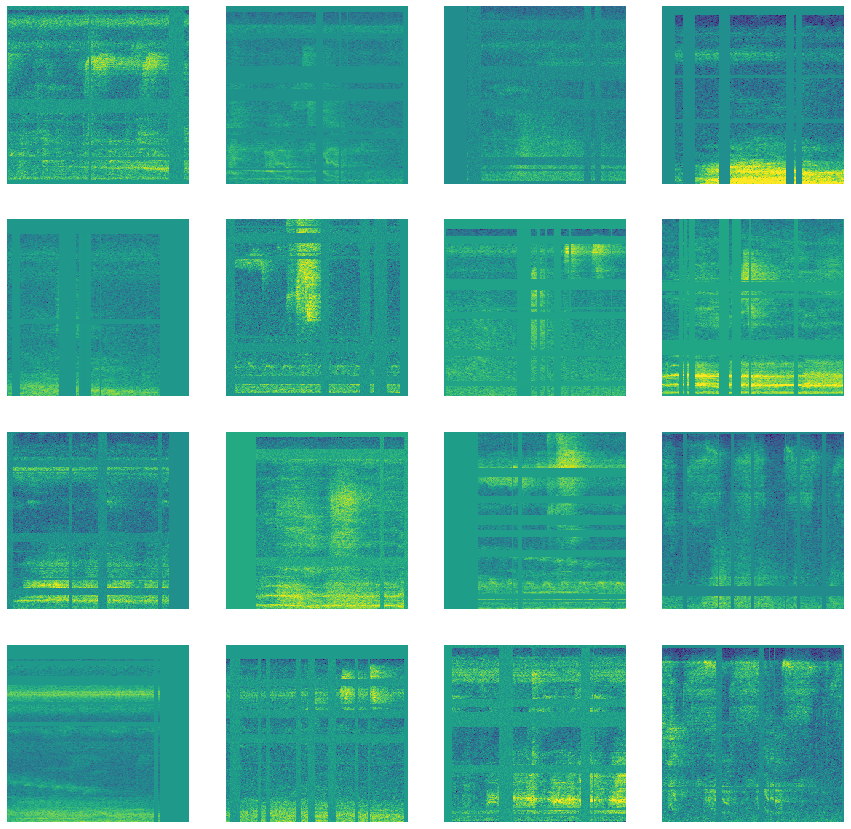

In [10]:
traingen = datagen.TrainGenerator(files_train,
                                  y_train,
                                  labels,
                                  batch_size = 16,
                                  augment = True,
                                  augment_blend_prob = 1,
                                  augment_max_time_masks = 10,
                                  augment_max_time_mask_size = 0.1,
                                  augment_max_freq_masks = 10,
                                  augment_max_freq_mask_size = 0.1,
                                  augment_add_noise_prob = 0.5,
                                  augment_add_noise_stds = 0.5,
                                  augment_max_time_shift = 0.33,
                                  augment_max_freq_shift = 0.1,
                                  augment_max_contrast = 2.0,
                                  shuffle = True,
                                  assume_absent = True,
                                  label_format = 'multi-label')
%time batch = traingen.__getitem__(0)
print('Batch shape:',batch[0].shape)
print('Target shape:',batch[1].shape)
datagen.plot_batch_samples(batch[0])
# plt.pcolormesh(batch[0][0])
# plt.colorbar();
# plt.clim([-100, 20])
batch3 = batch[0]


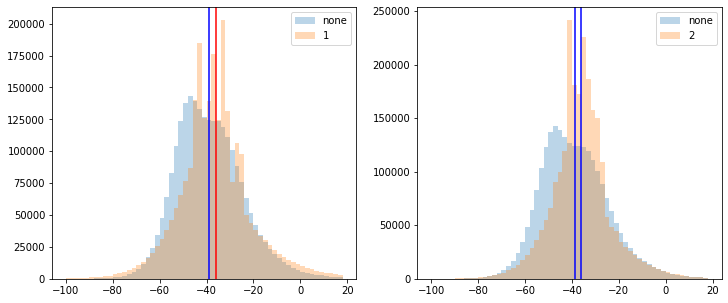

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(batch1.numpy().flatten(),range(-100, 20, 2), alpha=0.3, label='none')
plt.gca().axvline(batch1.numpy().mean(), c='b')
plt.hist(batch2.numpy().flatten(),range(-100, 20, 2), alpha=0.3, label='1')
plt.gca().axvline(batch2.numpy().mean(), c='r')
plt.legend();

plt.subplot(1,2,2)
plt.hist(batch1.numpy().flatten(),range(-100, 20, 2), alpha=0.3, label='none')
plt.gca().axvline(batch1.numpy().mean(), c='b')
plt.hist(batch3.numpy().flatten(),range(-100, 20, 2), alpha=0.3, label='2')
plt.gca().axvline(batch3.numpy().mean(), c='b')
plt.legend();



#### Create model
---

In [10]:
model = models.ImageNetModel(backbone=imagenet_models.MobileNetV2,
                             num_classes=len(labels),
                             input_shape=batch[0][0].shape)


In [11]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy())
model.fit(traingen,
          steps_per_epoch=3) # for example


3/3 [==============================] - 9s 2s/step - loss: 0.4786
